# Dimensionality Reduction: PCA

Clustering was about **Grouping**. 
PCA (Principal Component Analysis) is about **Simplifying**.

### The Problem: The Curse of Dimensionality
We can plot 2D data (X, Y). We can plot 3D data (X, Y, Z). 
But what if our data has **30 dimensions** (Features)? We can't see it. Our brains can't comprehend it.

### The Solution: PCA
PCA finds the "best angle" to look at the data so that we can flatten it into 2D without losing the important patterns (Variance).

## Load Data (Breast Cancer)
This dataset has **30 Features** (Radius, Texture, Smoothness, etc.). Ideally, we want to separate Benign vs Malignant.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load Data
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

print(f"Original Shape: {df.shape} (30 Dimensions!)")
df.head()

Original Shape: (569, 30) (30 Dimensions!)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Standardization (CRITICAL Step)
PCA calculates variance. If one feature is measured in "Millimeters" (0.1) and another in "Pixels" (1000), PCA will think the Pixels are more important just because the number is bigger.

**Rule:** ALWAYS Scale data before PCA.

In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

## Apply PCA
We will compress 30 dimensions down to just **2 Principal Components**.

In [3]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Original Shape: {X_scaled.shape}")
print(f"Reduced Shape:  {X_pca.shape}")

Original Shape: (569, 30)
Reduced Shape:  (569, 2)


## Visualizing the Result
Now we have 2 dimensions, so we CAN plot it!

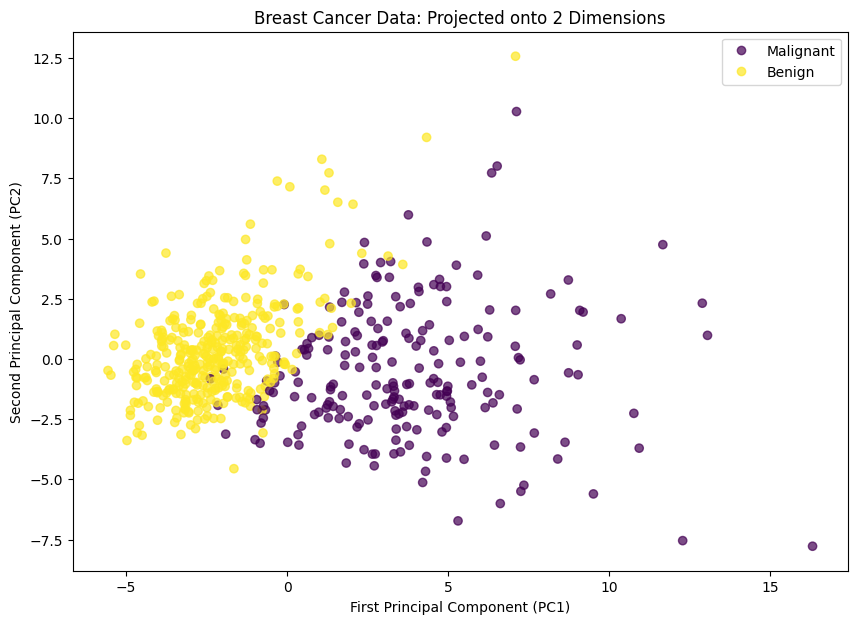

In [4]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, cmap='viridis', alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=['Malignant', 'Benign'])
plt.title("Breast Cancer Data: Projected onto 2 Dimensions")
plt.xlabel("First Principal Component (PC1)")
plt.ylabel("Second Principal Component (PC2)")
plt.show()

### Interpretation
Look at that separation! 
Even though we threw away 28 dimensions, the **Benign** and **Malignant** tumors are clearly separated.

This confirms that the "Signal" for cancer exists mostly in these 2 components, and the other 28 dimensions were largely redundant or noise.

## Explained Variance (The Cost)
How much information did we actually lose?

In [5]:
print(f"Explained Variance per PC: {pca.explained_variance_ratio_}")
print(f"Total Information Kept: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Explained Variance per PC: [0.44272026 0.18971182]
Total Information Kept: 63.24%


### Conclusion
We usually keep around **63%** of the information. 
Meaning: We compressed the file by 15x (30 cols -> 2 cols) but kept almost 2/3rds of the meaning. That is the power of PCA.